In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import pandas_datareader as data
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive
%cd MyDrive
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive'
/content/drive
/content/drive/MyDrive
'10th marksheet.pdf'
'12th marksheet.pdf'
'1st sem (1).pdf'
'1st sem.pdf'
'3RD SEM.pdf'
 AADHAR_CARD.png
'acm team leetcode.gsheet'
'amazon ml school.pdf'
 arti..0.1certificate.pdf
 Atlassian
 certificates_merged.pdf
 certificates.pdf
'codevita 2022_merged.pdf'
'codevita 2022.pdf'
'Colab Notebooks'
 Compilers.gdoc
'Cover Letter.doc'
'c++ project.pdf'
 cv.gdoc
 Imp
'ISHIKA GOYAL__GRAPHIC ERA UNIVERSITY.pdf'
'New doc Mar 31, 2021 2.18 PM.pdf'
 PAN_CARD.pdf
 photo.jpeg
'python 1st certificate.pdf'
 report.pdf
 resume
'resume (1)'
'Resume (1) (1).pdf'
'Resume (1).pdf'
 resume.pdf
 Resume.pdf
 Screenshot_2022-07-07-21-22-34-61_e307a3f9df9f380ebaf106e1dc980bb6.jpg
'sem4_certificates .pdf'
 UC-JDEHRSA9.pdf
'Untitled document.gdoc'
'Untitled form (1).gform'
'Untitled form.gform'
'Untit

In [5]:
%cd Colab Notebooks
!ls

/content/drive/MyDrive/Colab Notebooks
 dataset.csv  'stock price.ipynb'


In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

In [ ]:
df = df.reset_index()

In [ ]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,11.416071,11.466071,11.378571,11.448571,262511200
1,1,11.584643,11.609286,11.464286,11.488214,439815600
2,2,11.490357,11.519286,11.392857,11.438929,351008000
3,3,11.428571,11.535714,11.399643,11.441429,417312000
4,4,11.467500,11.521786,11.432143,11.473214,322030800


In [ ]:
plt.plot(df.Close)

In [ ]:
ma100 = df.Close.rolling(100).mean()
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
df.shape

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

In [ ]:
data_training.head()


In [ ]:
data_testing.head()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

In [ ]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])


In [ ]:
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs= 100 )

Epoch 1/30
146/146 [==============================] - 98s 644ms/step - loss: nan
Epoch 2/30
146/146 [==============================] - 92s 631ms/step - loss: nan
Epoch 3/30
146/146 [==============================] - 90s 618ms/step - loss: nan
Epoch 4/30
146/146 [==============================] - 91s 624ms/step - loss: nan
Epoch 5/30
146/146 [==============================] - 91s 623ms/step - loss: nan
Epoch 6/30
146/146 [==============================] - 90s 614ms/step - loss: nan
Epoch 7/30
146/146 [==============================] - 90s 618ms/step - loss: nan
Epoch 8/30
146/146 [==============================] - 91s 625ms/step - loss: nan
Epoch 9/30
146/146 [==============================] - 89s 612ms/step - loss: nan
Epoch 10/30
146/146 [==============================] - 91s 625ms/step - loss: nan
Epoch 11/30
146/146 [==============================] - 92s 628ms/step - loss: nan
Epoch 12/30
146/146 [==============================] - 91s 620ms/step - loss: nan
Epoch 13/30
146/146 [====

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100 = data_training.tail(100)

In [ ]:
final_df = past_100.append(data_testing, ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data.shape

In [ ]:
input_data

In [ ]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(3177, 100, 1)
(3177,)


In [ ]:
y_predicted= model.predict(x_test)
y_predicted.shape

100/100 [==============================] - 5s 50ms/step


(3177, 1)

In [ ]:
y_test

array([0.01470046, 0.01577233, 0.01420936, ..., 0.76566487, 0.77542165,
       0.77262589])

In [ ]:
y_predicted

array([[0.01581006],
       [0.01595224],
       [0.01609934],
       ...,
       [0.7849277 ],
       [0.7811905 ],
       [0.7769345 ]], dtype=float32)

In [ ]:
scale_factor = 1/(scaler.scale_)
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

Text(0, 0.5, 'Price')

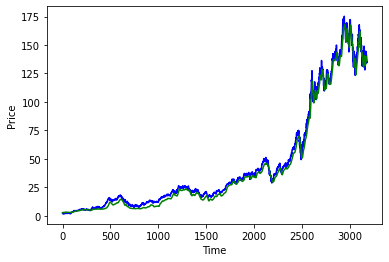

In [ ]:
from cProfile import label

# plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label = 'original price')
plt.plot(y_predicted, 'g',label='predicted price' )
plt.xlabel('Time')
plt.ylabel('Price')